In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.cosmology import WMAP9 as cosmo
import numpy.random as ra
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.misc import derivative
from sympy import *

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24

########## PLOTTING FORMATTING #############
# plt.title("Cuve Optimization",fontsize = 42, y = 1.01) #takes in a z, spit
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)
# plt.legend(prop={'size': 20})

# DM(z) Relation

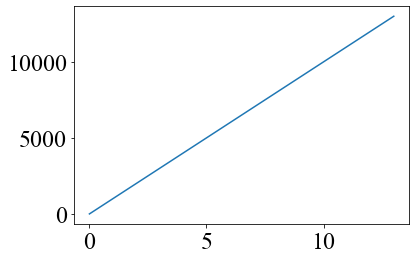

In [3]:
z = np.arange(0,14,1)

def DM(z):
    return 1000*z
plt.plot(z,DM(z))

# this is obviously not correct when we take reionization into account

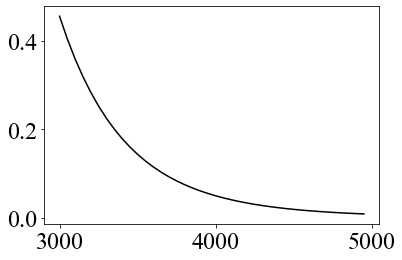

In [4]:
p_i = 1

def dndDM(DM):
    p_z = p_i*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
    dVdz = cosmo.differential_comoving_volume(z)
    dzdDm = 1/(1000)
    return (p_z/(1+z))*dVdz*dzdDm

DM = np.arange(3000,5000,50)
z = DM/1000
norm = np.linalg.norm(dndDM(DM))
plt.plot(DM,dndDM(DM)/norm, c = 'k')


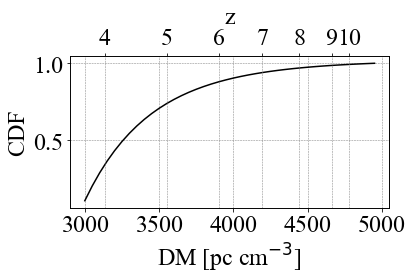

In [11]:
pdf = np.asarray([DM,dndDM(DM)])
prob = pdf[1]/float(sum(pdf[1]))
cum_prob = np.cumsum(prob)

def gen_DMs(N):
    R = ra.uniform(0, 1, N)
    #Here we first find the bin interval that random number lies in min(cum_prob[])
    #then we find the flux who's index is that cum_prob
    #repat for all r in R
    return [int(DM[np.argwhere(cum_prob == min(cum_prob[(cum_prob - r) > 0]))]) for r in R]


#DM_tot = np.piecewise(z_new[1:], [z_new[1:] < z_cutoff , z_new[1:] >= z_cutoff], [lambda z: popt_low[0] * (z**(popt_low[1])) + popt_low[2], lambda z:popt_high[0] * (z**(popt_high[1])) + popt_high[2]])

#z_high = ((DM-popt_high[2])/popt_high[0])**(1/popt_high[1])

#here's our fiducial model!
# z_data = np.sort(np.asarray([10.,  9.01803607,  8.03607214,  7.05410822,  6.07214429,
#         5.09018036,  4.10821643,  3.12625251,  2.14428858,  1.16232465,
#         0.18036072]))
# DM_data = np.sort(np.asarray([4778.97050922, 4680.63257466, 4513.23900886, 4239.91853307, 3834.17271727,
#  3351.56617811, 2828.27014724, 2257.39519489, 1619.49482429,  902.54239865,
#   132.31555426]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(DM,cum_prob, c = 'k')
ax1.set_xlabel('DM [pc cm$^{-3}$]', fontsize = 24)
ax1.set_ylabel('CDF', fontsize = 24)
ax1.set_xticks(np.arange(min(DM), max(DM)+500, 500))
ax1.grid(color='gray', linestyle='--', linewidth=0.5)


new_tick_locations = np.array( [3136, 3555.56617811, 3900.17271727, 4190.91853307,4443.23900886, 4665.63257466, 4778.97050922])



def tick_function_z(DM):
    Z = ((DM-popt_high[2])/popt_high[0])**(1/popt_high[1])
    return ["%.f" % z for z in Z]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function_z(new_tick_locations))
ax2.set_xlabel('z', fontsize = 24)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

fig.tight_layout()

fig.savefig('cumprob_DM.png', dpi=100)


# plt.plot(DM,cum_prob, c = 'k')
# plt.xticks(np.arange(min(DM), max(DM)+1000, 1000))
# plt.ylabel('CDF',fontsize = 24)
# plt.xlabel('DM [pc cm$^{-3}$]', fontsize = 24)


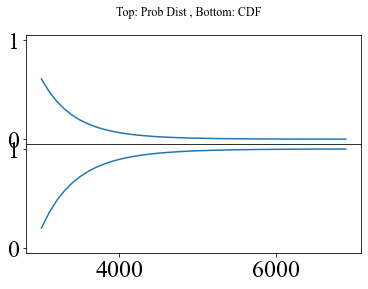

In [67]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Top: Prob Dist , Bottom: CDF')
axs[0].plot(DM, dndDM(DM)/norm)
axs[1].plot(DM, cum_prob)

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

Text(0, 0.5, 'dn/dDM')

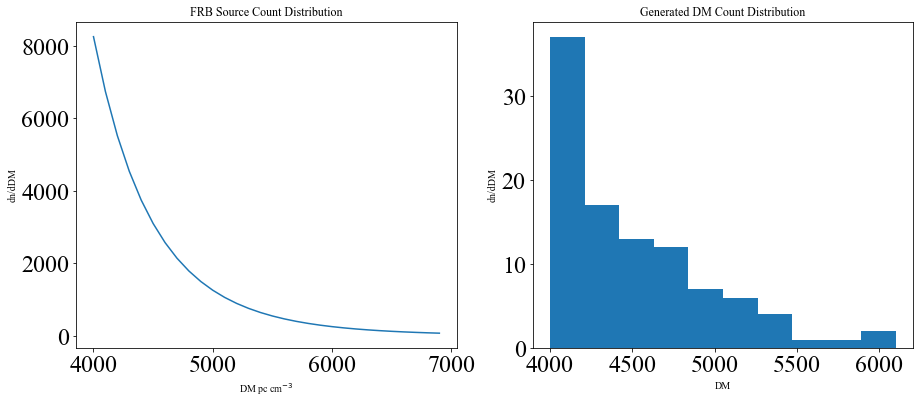

In [27]:
N= 100
generated_DMs = gen_DMs(N)
fig, ax = plt.subplots(1,2, figsize = (15,6))

ax[0].plot(DM, dndDM(DM))
ax[0].set_title('FRB Source Count Distribution')
ax[0].set_xlabel('DM pc cm$^{-3}$')
ax[0].set_ylabel('dn/dDM')

#plt.plot(pdf[0],pdf[1], label = 'Original PDF')
ax[1].hist(generated_DMs, label = 'Simulated PDF')
#ax[1].legend()
ax[1].set_title('Generated DM Count Distribution')
ax[1].set_xlabel('DM')
ax[1].set_ylabel('dn/dDM')

# Source Count Distribution 

100 100


Text(0, 0.5, 'dn/dDM')

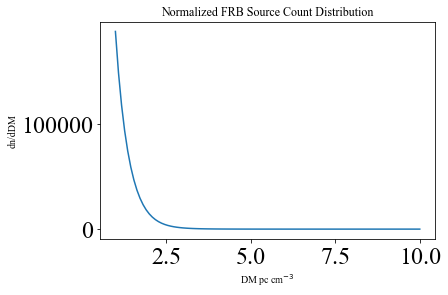

In [49]:
p_i = 0.015 # star forming density today, rho inital


# def dndDM_z(z):
#     p_z = p_i*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
#     dVdz = cosmo.differential_comoving_volume(z)
#     dzdDm = (z**(1/5))/200
#     return (p_z/(1+z))*dVdz*dzdDm

def dndDM_linear(z):
    p_z = p_i*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
    dVdz = cosmo.differential_comoving_volume(z)
    dzdDm = 1/(1000)
    return (p_z/(1+z))*dVdz*dzdDm



z_linear = np.linspace(1,10,100,endpoint=True)
DM_linear = 1000*z_linear
# DM = 1000*(z_linear**(1/5))

print(len(z_linear), len(DM_linear))

plt.plot(z_linear, dndDM_linear(z_linear))
# plt.plot(DM_linear, dndDM_z(z_square), label = 'quintic')
plt.title('Normalized FRB Source Count Distribution')
plt.xlabel('DM pc cm$^{-3}$')
plt.ylabel('dn/dDM')


In [50]:
pdf = np.asarray([DM_linear,dndDM_linear(DM_linear)])
prob = pdf[1]/float(sum(pdf[1]))
cum_prob = np.cumsum(prob)

def gen_DMs(N):
    R = ra.uniform(0, 1, N)
    #Here we first find the bin interval that random number lies in min(cum_prob[])
    #then we find the flux who's index is that cum_prob
    #repat for all r in R
    return [int(DM_linear[np.argwhere(cum_prob == min(cum_prob[(cum_prob - r) > 0]))]) for r in R]


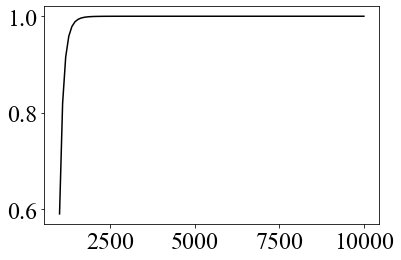

In [52]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

plt.plot(DM_linear,cum_prob, c = 'k')

# plt.xlabel('$S_*$ (mJy)')
# plt.ylabel('')

1.create cumulative prob distrubution, 
2.Generate sources with certain DMs  
3.Assign to each source a random flux (maybe just start with gaussian)--> do we even really care about the flux? kind of because this changes the detection rate. 

Text(0, 0.5, 'dn/dDM')

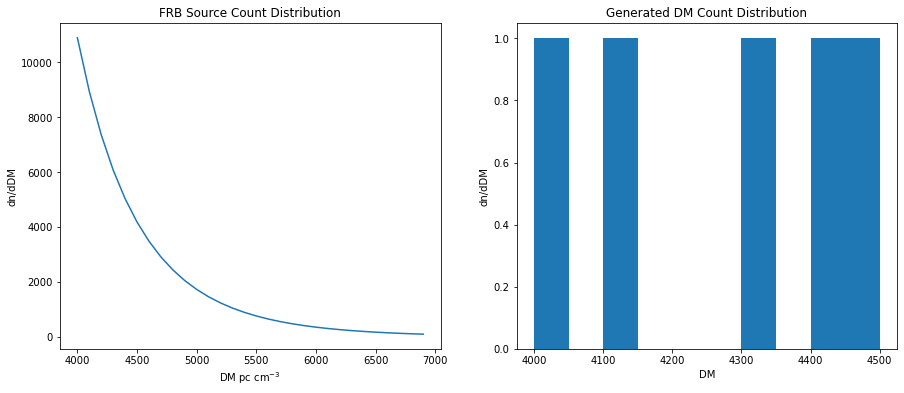

In [62]:
N = 5
generated_DMs = gen_DMs(N)
fig, ax = plt.subplots(1,2, figsize = (15,6))

ax[0].plot(DM, dndDM(DM))
ax[0].set_title('FRB Source Count Distribution')
ax[0].set_xlabel('DM pc cm$^{-3}$')
ax[0].set_ylabel('dn/dDM')

#plt.plot(pdf[0],pdf[1], label = 'Original PDF')
ax[1].hist(generated_DMs, label = 'Simulated PDF')
#ax[1].legend()
ax[1].set_title('Generated DM Count Distribution')
ax[1].set_xlabel('DM')
ax[1].set_ylabel('dn/dDM')

okay so based on this its almost impossible to detect any high DM FRBs. Of this sample of 1000, only ~10 of them above DM 5. And of those, we have no idea how many actually have observable properties. One thing we could do is say that this DM/z relation is bogus, and if we take reionization into accound it's better. 

# Source Count Distribution With Reionization

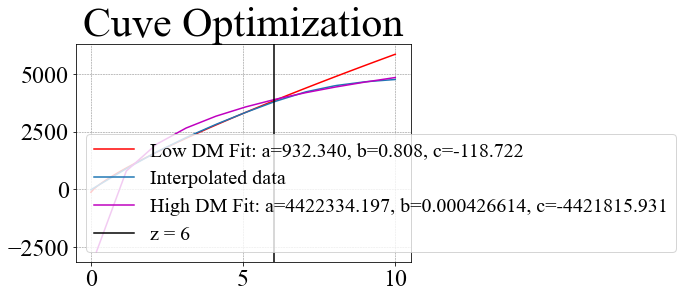

In [6]:
#here's our fiducial model!
z_data = np.sort(np.asarray([10.,  9.01803607,  8.03607214,  7.05410822,  6.07214429,
        5.09018036,  4.10821643,  3.12625251,  2.14428858,  1.16232465,
        0.18036072]))
DM_data = np.sort(np.asarray([4778.97050922, 4680.63257466, 4513.23900886, 4239.91853307, 3834.17271727,
 3351.56617811, 2828.27014724, 2257.39519489, 1619.49482429,  902.54239865,
  132.31555426]))

#I interpolated the data to have more points to fit
z_new = np.linspace(0,10,num = 100,endpoint=True)
f = interp1d(z_data, DM_data,fill_value="extrapolate")

#here's my guess function for the fit, I guessed polynomial
def poly(x, a, b, c):
    return a * (x**(b)) + c

func = poly

#here's where I fit the interpolated data
popt_low, pcov_low = curve_fit(func, z_new[:60], f(z_new)[:60])
popt_high, pcov_high = curve_fit(func, z_new[60:], f(z_new)[60:], maxfev=9000)

#Here's where I plot the interpolated data with the original data
plt.plot(z_new, func(z_new, *popt_low), 'r-',label='Low DM Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_low))
plt.plot(z_new,f(z_new),label = 'Interpolated data')
plt.plot(z_data, func(z_data, *popt_high),label='High DM Fit: a=%5.3f, b=%5.9f, c=%5.3f' % tuple(popt_high),color = 'm')
plt.axvline(x=6,color = 'k',label = 'z = 6')
plt.title("Cuve Optimization",fontsize = 42, y = 1.01) #takes in a z, spit
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(prop={'size': 20})


In [396]:
x = z_new
y = f(z_new)
#print(y)
print(x)
dydx = np.diff(x)/np.diff(y)

dnddm = derivative(f, 10.0, dx=(z_new[1]-z_new[0]))

print(dnddm)

print(dydx)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

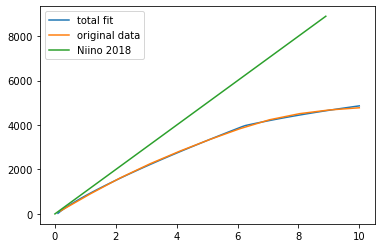

In [311]:
z_cutoff = 6.2
DM_tot = np.piecewise(z_new[1:], [z_new[1:] < z_cutoff , z_new[1:] >= z_cutoff], [lambda z: popt_low[0] * (z**(popt_low[1])) + popt_low[2], lambda z:popt_high[0] * (z**(popt_high[1])) + popt_high[2]])
#maybe I can lambdify this??

plt.plot(z_new[1:],DM_tot,label = 'total fit')
plt.plot(z_data,DM_data,label = 'original data')
plt.plot(z,1000*z, label = 'Niino 2018')
plt.legend()


<ipython-input-407-53d597aee24e>:11: RuntimeWarning: divide by zero encountered in true_divide
  p_z = p_i*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
<ipython-input-407-53d597aee24e>:11: RuntimeWarning: divide by zero encountered in true_divide
  p_z = p_i*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
<ipython-input-410-8c136583414e>:11: RuntimeWarning: divide by zero encountered in true_divide
  p_z = 0.015*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/astropy/units/quantity.py:477: Ru

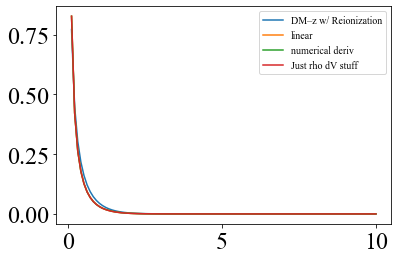

In [410]:
x = symbols('x')
init_printing(use_unicode=True)

# Here I define the entire source count distribution for both low and high redshift. 
#This function takes redshift as input but we will plot it against the corresponding DM. 
#This corresponding DM changes depending on which part of the plot you are working in. 



def rho_dVdz(z): #dndDM 
    p_z = 0.015*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
    dVdz = cosmo.differential_comoving_volume(z)
    return (p_z/(1+z))*dVdz#*numerical deriv at z 
    
def dzdDM_low(z):
    return (1/(popt_low[0]*popt_low[1]))*(z**(1-popt_low[1]))

def dzdDM_high(z):
    return(1/(popt_high[0]*popt_high[1]))*(z**(1-popt_high[1]))


# print(1/1000)
# print(dzdDM_low(z_new))
# print(dzdDM_high(z_new))

#define source count with reionization 
dndDM_reion = np.piecewise(z_new[1:], [z_new[1:] < z_cutoff , z_new[1:] >= z_cutoff], [lambda z: rho_dVdz(z)*dzdDM_low(z), lambda z: rho_dVdz(z)*dzdDM_high(z)])
norm_reion = np.linalg.norm(dndDM)

#initialize source count with linear DM–z. Remember to remove the first element since that's when z=0! 
source_count_linear= np.asarray(dndDM_linear(z_new)[1:])

# print(len(rho_dVdz(z_new)))
# print(rho_dVdz(z_new))
numerical_source_count = rho_dVdz(z_new)[1:]*dydx
# print(numerical_source_count)
numerical_norm = np.linalg.norm(numerical_source_count)

#DM_tot is an array that has calculated the 
plt.plot(z_new[1:],dndDM_reion/norm_reion, label = 'DM–z w/ Reionization')
plt.plot(z_new, dndDM_linear(z_new)/norm_linear,label = 'linear')
plt.plot(z_new[1:], numerical_source_count/numerical_norm, label = 'numerical deriv')
plt.plot(z_new[1:], rho_dVdz(z_new[1:])/np.linalg.norm(rho_dVdz(z_new)[1:]), label = 'Just rho dV stuff')
plt.legend()

Text(0.5, 1.01, 'rho dV * dzdDM')

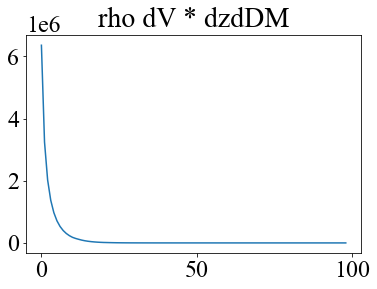

In [398]:
plt.plot(numerical_source_count)
plt.title('rho dV * dzdDM', fontsize = '28', y = 1.01)

Text(0.5, 1.01, 'rho dV stuff only')

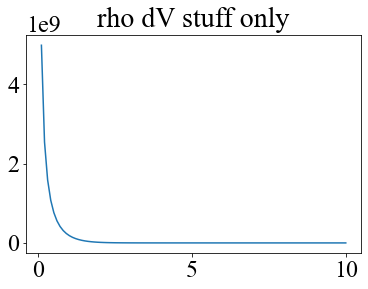

In [385]:
plt.plot(z_new[1:],rho_dVdz(z_new[1:]))
plt.title('rho dV stuff only', fontsize = '28', y = 1.01)

Text(0.5, 1.01, 'dzdDM')

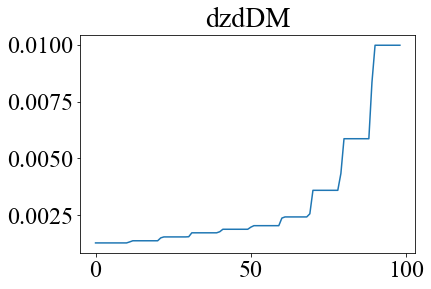

In [386]:
plt.plot(dydx)
plt.title('dzdDM', fontsize = '28', y = 1.01)

# Outside In

<ipython-input-397-e82db0f3dace>:11: RuntimeWarning: divide by zero encountered in true_divide
  p_z = 0.015*(((1/z)**(2.7))/(1+((1+z)/2.9)**5.6))
/Users/hannahfronenberg/miniconda3/envs/py3/lib/python3.9/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


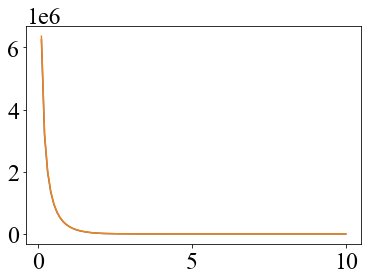

In [400]:
DM_data_outside = np.array([4565.67608302, 4543.66991924, 4511.71046158, 4467.79333098,
       4410.77848498, 4326.88100956, 4215.56796387, 4058.12767379,
       3864.62387983, 3640.69754233, 3403.68089057, 3154.23945438,
       2894.89787717, 2626.09648616, 2341.62928685, 2044.75407246,
       1727.7514829 , 1395.51077531, 1041.73945052,  666.14982913,
        281.75603848])
z_data_outside = np.array([10.        ,  9.51903808,  9.03807615,  8.55711423,  8.0761523 ,
        7.59519038,  7.11422846,  6.63326653,  6.15230461,  5.67134269,
        5.19038076,  4.70941884,  4.22845691,  3.74749499,  3.26653307,
        2.78557114,  2.30460922,  1.82364729,  1.34268537,  0.86172345,
        0.38076152])

#I interpolated the data to have more points to fit
z_interp = np.linspace(0,10,num = 100,endpoint=True)
f_interp = interp1d(z_data_outside, DM_data_outside,fill_value="extrapolate")

dmdm = f_interp(z_interp)
dydx_outside = np.diff(z_interp)/np.diff(dmdm)
numerical_outside = rho_dVdz(z_new)[1:]*dydx_outside

plt.plot(z_interp[1:], numerical_outside)
plt.plot(z_new[1:],numerical_source_count)


#calculate deriv

In [404]:
(numerical_source_count/np.linalg.norm(numerical_source_count))-(numerical_outside/np.linalg.norm(numerical_outside))

<Quantity [ 3.32356387e-05,  1.69537520e-05,  1.05821623e-05,
            7.17489671e-06,  5.09043874e-06,  3.71628012e-06,
            2.76634032e-06,  2.08772010e-06, -4.28438468e-04,
           -7.11256174e-04, -5.48315594e-04,  2.15599580e-04,
            7.13736718e-04,  7.65039135e-05, -1.02516038e-04,
           -7.92139150e-05, -6.11228838e-05, -4.70987211e-05,
           -2.33300286e-04, -1.88658790e-04, -1.45054110e-04,
            2.33183562e-05,  4.22429093e-05, -4.08460874e-06,
           -3.15396092e-06, -2.44092965e-06, -1.89414168e-06,
           -1.11451450e-05, -1.97084728e-05, -1.54421330e-05,
           -1.12541331e-05,  5.97782756e-06,  1.53513702e-06,
           -1.39551802e-07, -1.11399572e-07, -8.92640037e-08,
           -7.17959896e-08, -2.08145376e-06, -1.87972564e-06,
           -1.52853154e-06, -6.60515053e-07,  4.41487671e-07,
           -1.06555037e-07, -8.78339407e-08, -7.26341837e-08,
           -6.02524412e-08, -1.55856349e-07, -2.81810180e-07,
        